In [1]:
import pandas as pd
import numpy as np
#https://stackabuse.com/implementing-lda-in-python-with-scikit-learn/

############################ For regression: f_regression, mutual_info_regression
############################ For classification: chi2, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, BaggingRegressor, AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.decomposition import PCA, LatentDirichletAllocation
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE, ADASYN
%matplotlib inline
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_regression, f_classif, mutual_info_classif, mutual_info_regression
from time import time
from matplotlib.colors import ListedColormap
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
#import category_encoders as ce
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#https://jovian.ai/iguedeominiabohs/profit-prediction-of-1000-companies
#from mlxtend.evaluate import bias_variance_decomp
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso, LassoCV

In [2]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score

In [3]:
sourcePath = '/content/drive/MyDrive/Colab Notebooks/dataset/WOW.csv'
df = pd.read_csv(sourcePath)
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,17-01-2022,35.099998,35.560001,35.000000,35.450001,34.550426,2421955.0
1,18-01-2022,35.450001,35.639999,35.259998,35.279999,34.384739,1740897.0
2,19-01-2022,35.439999,35.730000,35.040001,35.400002,34.501698,2672306.0
3,20-01-2022,35.049999,35.500000,34.950001,35.080002,34.189816,2891532.0
4,21-01-2022,35.000000,35.099998,34.680000,34.750000,33.868187,3430927.0


In [5]:
dfworking = df.copy()
dfworking =  dfworking[['Date','Volume']]
dfworking.head(5)

,Date,Volume
0,17-01-2022,2421955.0
1,18-01-2022,1740897.0
2,19-01-2022,2672306.0
3,20-01-2022,2891532.0
4,21-01-2022,3430927.0


In [21]:
type(dfworking.iloc[:,0][0])

str

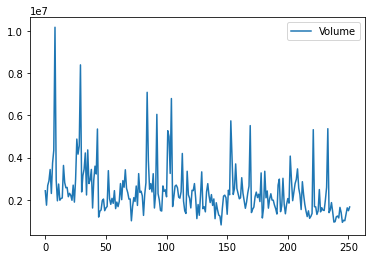

In [23]:
dfworking.plot()

In [24]:
dfworking

,Date,Volume
0,17-01-2022,2421955.0
1,18-01-2022,1740897.0
2,19-01-2022,2672306.0
3,20-01-2022,2891532.0
4,21-01-2022,3430927.0
...,...,...
248,11-01-2023,1310174.0
249,12-01-2023,1613352.0
250,13-01-2023,1479208.0
251,16-01-2023,1654920.0


In [26]:
anomaly_detect =  IsolationForest(contamination=0.1, n_estimators=50)
dfworking.loc[:,'anomalies'] = anomaly_detect.fit_predict(dfworking)

ValueError: ignored

In [ ]:
plt.plot(dfworking.Volume)
dfanomaly = dfworking.query('anomalies==1')
plt.plot(dfanomaly.Volume, 'or')